In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
customer = pd.read_csv('Telco-Customer-Churn.csv')
customer.head()
customer.info() 
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [2]:
#data cleaning
#forcing converts to numeric
customer['TotalCharges'] = pd.to_numeric(customer['TotalCharges'], errors='coerce')
#checking for null values
print(f"Nulls in TotalCharges: {customer['TotalCharges'].isnull().sum()}")
#filling nulls with 0 (since they are new customers) or completely drop them
customer['TotalCharges'].fillna(0, inplace=True)
#dropping 'customerID' as it has no predictive power
customer.drop('customerID', axis=1, inplace=True)
customer


Nulls in TotalCharges: 11


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


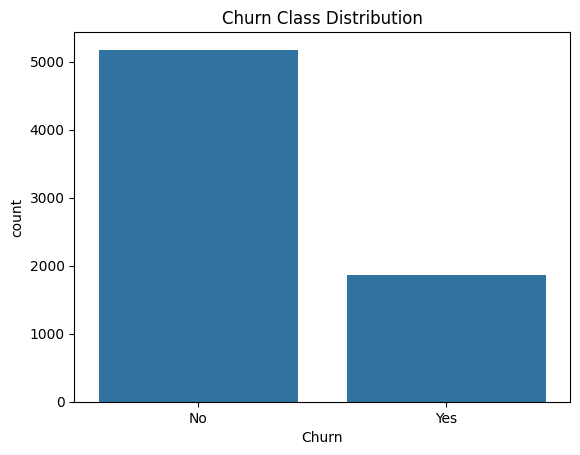

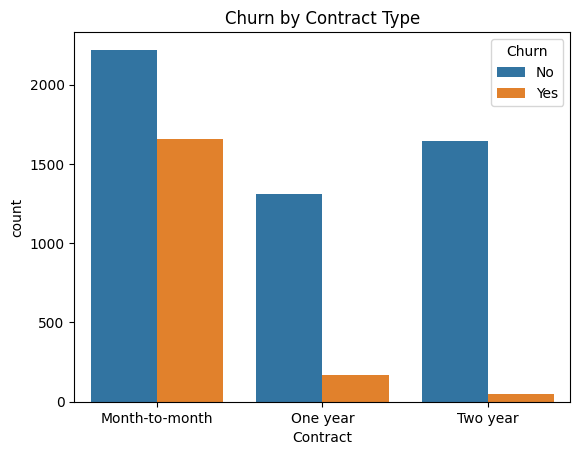

In [3]:
#eda
#visualising churn count
sns.countplot(x='Churn', data=customer)
plt.title("Churn Class Distribution")
plt.show()
#visualise churn by contract type
sns.countplot(x='Contract', hue='Churn', data=customer)
plt.title("Churn by Contract Type")
plt.show()

In [4]:
#preprocessing
#binary encoding for the target
customer['Churn'] = customer['Churn'].map({'Yes': 1, 'No': 0})
#one hot encoding for other categoricals
customer_encoded = pd.get_dummies(customer, drop_first=True) 

In [5]:
#model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#splitting data
x = customer_encoded.drop('Churn', axis=1)
y = customer_encoded['Churn']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#training the baseline model
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

#prediction
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



In [6]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

#standard splitting
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

#checking counts before SMOTE
print(f"Before SMOTE: {Counter(y_train)}")

Before SMOTE: Counter({0: 4139, 1: 1495})


In [7]:
#initialising SMOTE
smote = SMOTE(random_state=42)

#fitting SMOTE on the training data
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

#checking counts after SMOTE
print(f"After SMOTE: {Counter(y_train_resampled)}")

After SMOTE: Counter({0: 4139, 1: 4139})


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

#initializing model
rf_model = RandomForestClassifier(random_state=42)
#training on the balanced SMOTE data
rf_model.fit(x_train_resampled, y_train_resampled)
#prediction on the original (unlanaced) data
y_pred = rf_model.predict(x_test)
#results
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1035
           1       0.56      0.58      0.57       374

    accuracy                           0.77      1409
   macro avg       0.70      0.71      0.70      1409
weighted avg       0.77      0.77      0.77      1409



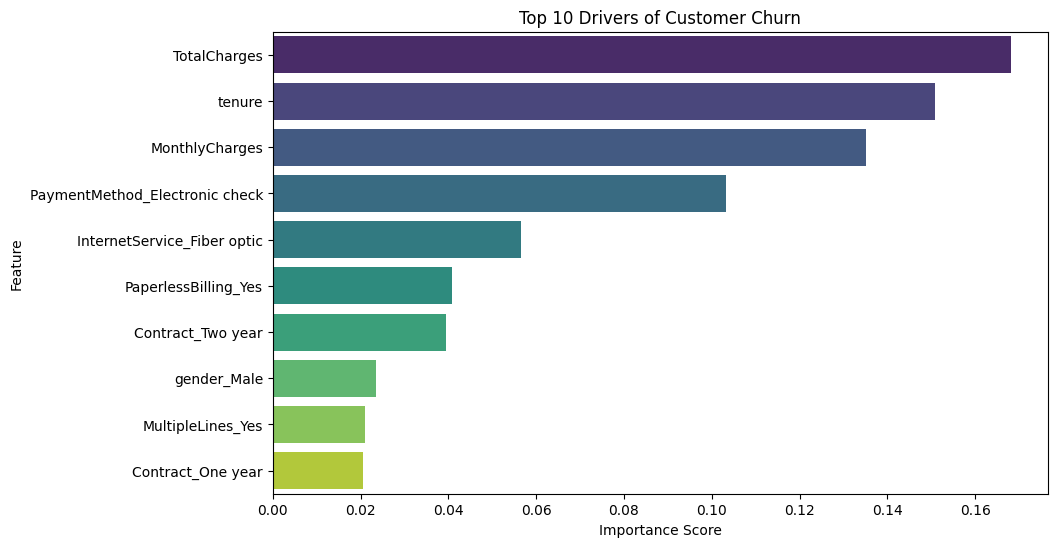

In [9]:
#getting the importance scores, and feature names
importances = rf_model.feature_importances_
feature_names = x.columns

#creating a df to ogarnize them
feature_importance_customer = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

#sorting by importance (highest on top)
feature_importance_customer = feature_importance_customer.sort_values(by='Importance', ascending=False)

#plotting the top 10 features
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature',
             data=feature_importance_customer.head(10),
             palette='viridis')
plt.title('Top 10 Drivers of Customer Churn')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show() 

In [10]:
from sklearn.inspection import permutation_importance

#calculaing permutaion importance
#n_repeats=10: running the shufling 10 times to ensure the result isn't just luck
#n_jobs=-1: use all CPU cores to make it faster
result = permutation_importance(
    rf_model, x_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
) 

In [11]:
#organising the data for plotting
perm_importance_customer = pd.DataFrame({
    'Feature': x_test.columns,
    'Importance_Mean': result.importances_mean,
    'Importance_Std': result.importances_std
}) 

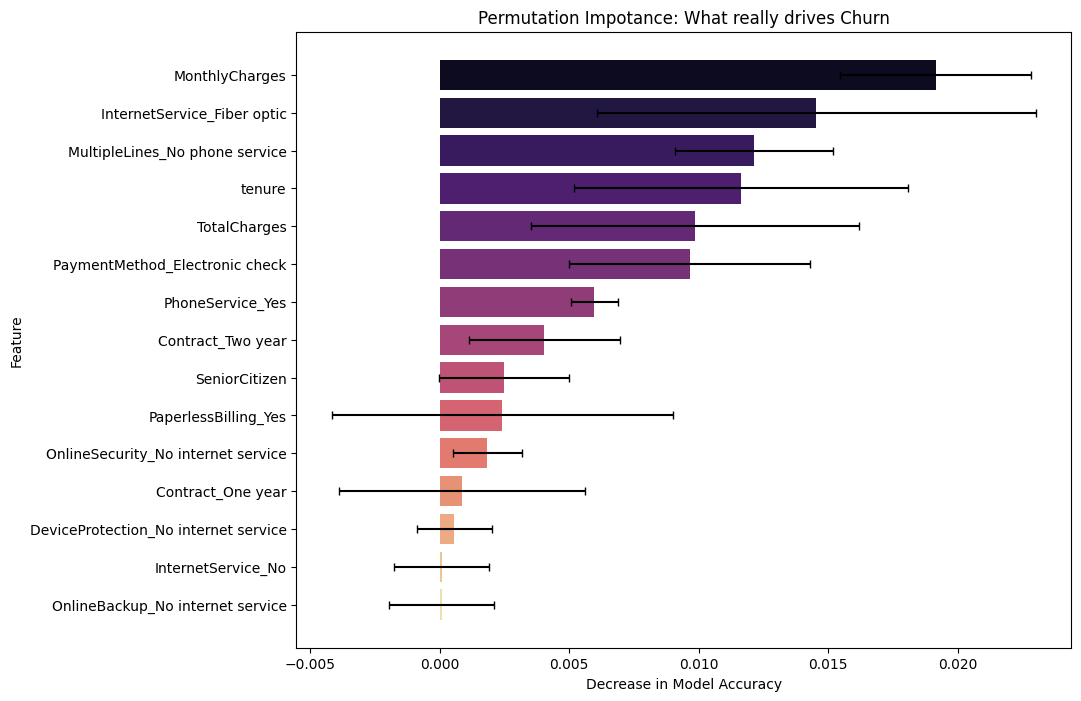

In [12]:
#sorting features by impact
perm_importance_customer = perm_importance_customer.sort_values(by='Importance_Mean', ascending=False)

#visuals
plt.figure(figsize=(10,8))
sns.barplot(x='Importance_Mean', y='Feature',
            data=perm_importance_customer.head(15),
            palette='magma'
) 

#adding errors to show stability
plt.errorbar(
    x=perm_importance_customer.head(15)['Importance_Mean'],
    y=perm_importance_customer.head(15)['Feature'],
    xerr=perm_importance_customer.head(15)['Importance_Std'],
    fmt='none', c='black', capsize=3
)
plt.title('Permutation Impotance: What really drives Churn')
plt.xlabel('Decrease in Model Accuracy')
plt.ylabel('Feature')
plt.show() 

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
#cross-validation
#defining operations 
#'smote': unsampling training fold
#'model': training the classifier
pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(random_state=42))
])

In [17]:
#defining spliting strategy
#stratifiedKFold ensures each fold has the same % of Churners as the original data
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [20]:
#running cross-validation
#using F1-Score because accuracy is misleading for imbalanced data
cv_scores = cross_val_score(pipeline, x, y, cv=cv, scoring='f1')
print(f"F1 Scores for each fold: {cv_scores}")
print(f"Average F1 Score: {cv_scores.mean():.4f}")

F1 Scores for each fold: [0.5994695  0.59007833 0.59437751 0.56644295 0.56198347]
Average F1 Score: 0.5825


In [23]:
from sklearn.model_selection import GridSearchCV
#defining parameter grid
#test running number of numbers of tress, and different depths
param_grid= {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10]
} 

In [26]:
#setting up grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=2)
print("Searching Grid Search.. (this might be slow)")
grid_search.fit(x_train, y_train) 

print("Best F1 Score:", grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)

Searching Grid Search.. (this might be slow)
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best F1 Score: 0.6260469042691174
Best Parameters: {'model__max_depth': 10, 'model__min_samples_split': 10, 'model__n_estimators': 50}


In [27]:
#prediction using the best model found
best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(x_test)

In [28]:
#comparing with first result gotten
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred_optimized)) 

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1035
           1       0.54      0.69      0.61       374

    accuracy                           0.76      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.76      0.77      1409



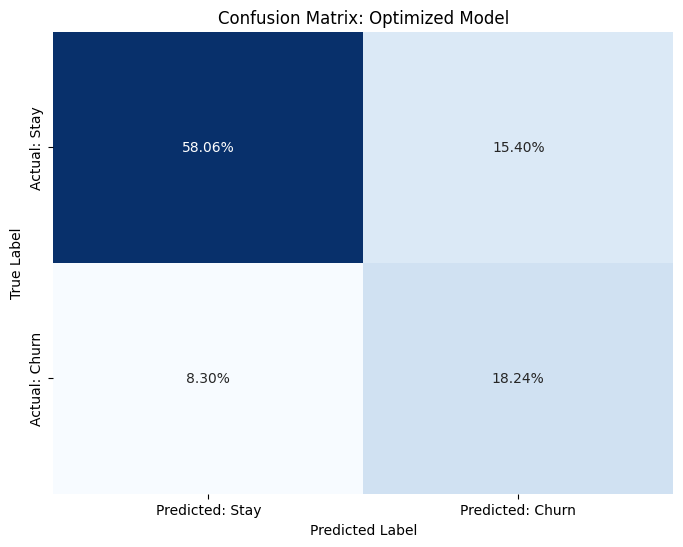

In [40]:
#visualizing results 
#confusion matrix heatmap
#generating matrix
cm = confusion_matrix(y_test, y_pred_optimized)
cm_percent = cm.astype('float') / cm.sum()
plt.figure(figsize=(8,6))
sns.heatmap(cm_percent, annot=True, fmt='.2%', cmap='Blues', cbar=False,
            xticklabels=['Predicted: Stay', 'Predicted: Churn'],
            yticklabels=['Actual: Stay', 'Actual: Churn'])
plt.title('Confusion Matrix: Optimized Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show() 